In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 11.25 월
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


In [ ]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다.
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다.
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'
"""단어를 정수 인덱스와 매핑
**정수 인덱스(key)**를 **단어(value)**와 매핑
	•	<PAD>: 패딩(Padding)용 토큰. 입력 길이를 동일하게 맞추기 위해 사용됩니다.
	•	<BOS>: 문장의 시작(Start of Sentence)을 나타내는 토큰.
	•	Key: 단어에 해당하는 고유한 정수 인덱스.
	•	Value: 단어(혹은 특수 토큰).
"""

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


In [ ]:
# word : index 단어 -> 인덱스 순으로 역순으로 매핑
word_to_index={word:index for index, word in index_to_word.items()}
# word_to_index = {v: k for k, v in index_to_word.items()}
# 이 딕셔너리는 단어를 주면 그 단어의 인덱스를 반환하는 방식으로 사용
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [ ]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


In [ ]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다.
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]
# 리스트간 결합 : [<BOS>] + [3, 6, 7] = [1, 3, 6, 7].
# 이렇게 텍스트 혹은 범주형 데이터를 정수에 대응하는 방법을 ‘정수 인코딩’ 이라고 한다.
# 인코딩은 이 외에도 원-핫 인코딩, 멀티-핫 인코딩 등이 있습니다.
print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


In [ ]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index): # 복수형, 위 def와 차이점
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 위에서 정의한 sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다.
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [ ]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. = 원래 텍스트 데이터로 복구
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])
    #[1:]를 통해 <BOS>를 제외
    # 존재하지 않으면 <UNK>(Unknown Token)를 반환합니다.
    #	•	복원된 단어 리스트를 공백(' ')으로 연결하여 원래 문장으로 만듭니다.
	  # •	예: ['i', 'feel', 'hungry'] → 'i feel hungry'.

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


텍스트가 숫자로 변환되어 인공지능 모델의 입력으로 사용될 수 있게 되었지만, 이것으로 충분하지는 않습니다. 'i feel hungry'가 1, 3, 4, 5 로 변환되었지만 이 벡터는 텍스트에 담긴 언어의 의미와 대응되는 벡터가 아니라 임의로 부여된 단어의 순서에 불과합니다. 우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝짓는 것이었습니다. 그래서 단어의 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고 이를 딥러닝을 통해 학습해서 최적화하게 됩니다. Tensorflow, Pytorch 등의 딥러닝 프레임워크들은 이러한 의미 벡터 파라미터를 구현한 Embedding 레이어를 제공합니다.

-> 해석  
	2.	의미를 담은 벡터의 필요성:  
	•	단순히 숫자로 변환하는 것은 텍스트에 담긴 언어적 의미를 반영하지 못합니다.  
	•	우리가 하려는 것은, 각 단어를 의미를 가진 벡터와 매핑하는 것입니다.  
	•	예: 'hungry' → [0.1, 0.7, -0.3] (의미를 나타내는 벡터)  
	3.	훈련 가능한 벡터:  
	•	단어와 의미를 나타내는 벡터를 연결하고, 이를 모델 학습 과정에서 최적화할 수 있도록 합니다.  
	•	이러한 벡터는 학습 가능한 파라미터로 설정됩니다.  
	4.	딥러닝 프레임워크에서의 지원:  
	•	TensorFlow, PyTorch 등의 딥러닝 프레임워크는 이러한 단어 의미 벡터를 학습하는 도구를 제공합니다.  
	•	이를 위해 Embedding 레이어라는 기능을 사용합니다.  

In [ ]:
# Embedding 레이어를 활용하여 이전 스텝의 텍스트 데이터를 워드 벡터 텐서 형태로 다시 표현해 보겠습니다.

In [ ]:
"""주의해야 할 점이 있습니다.
Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다.
raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5입니다.
Tensorflow에서는 tf.keras.preprocessing.sequence.pad_sequences라는 편리한 함수를 통해
문장 벡터 뒤에 패딩(<PAD>)을 추가하여 길이를 일정하게 맞춰주는 기능을 제공합니다.

코드 설명
  3.	padding='post':
	•	패딩을 리스트의 끝에 추가합니다.
	•	다른 옵션으로 padding='pre'는 패딩을 리스트의 앞에 추가합니다.
	4.	maxlen=5:
	•	각 시퀀스의 최대 길이를 5로 제한합니다.
	•	길이가 긴 시퀀스는 잘리고, 짧은 시퀀스는 패딩으로 채워집니다.

딥러닝 모델에서 배치 단위로 데이터를 처리하려면 모든 입력 시퀀스의 길이가 동일해야 합니다.
pad_sequences는 이를 위해 짧은 문장에는 패딩을 추가하고, 긴 문장은 잘라내어 길이를 맞춥니다.

"""


"주의해야 할 점이 있습니다.\nEmbedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다.\nraw_inputs의 3개 벡터의 길이는 각각 4, 4, 5입니다.\nTensorflow에서는 tf.keras.preprocessing.sequence.pad_sequences라는 편리한 함수를 통해\n문장 벡터 뒤에 패딩(<PAD>)을 추가하여 길이를 일정하게 맞춰주는 기능을 제공합니다.\n\n코드 설명\n  3.\tpadding='post':\n\t•\t패딩을 리스트의 끝에 추가합니다.\n\t•\t다른 옵션으로 padding='pre'는 패딩을 리스트의 앞에 추가합니다.\n\t4.\tmaxlen=5:\n\t•\t각 시퀀스의 최대 길이를 5로 제한합니다.\n\t•\t길이가 긴 시퀀스는 잘리고, 짧은 시퀀스는 패딩으로 채워집니다.\n\n딥러닝 모델에서 배치 단위로 데이터를 처리하려면 모든 입력 시퀀스의 길이가 동일해야 합니다.\npad_sequences는 이를 위해 짧은 문장에는 패딩을 추가하고, 긴 문장은 잘라내어 길이를 맞춥니다.\n\n"

In [ ]:
import numpy as np
import tensorflow as tf
import os

# # 선행과정에 필요한 것
# raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
#                                                        value=word_to_index['<PAD>'],
#                                                        padding='post',
#                                                        maxlen=5)
# print(raw_inputs)

In [ ]:
# # 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다.
# vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
# word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다.

# embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# # 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다.
# raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
# output = embedding(raw_inputs)
# print(output)

In [ ]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10 (pad포함 0~9까지 설정했었음)
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정합니다. = 각 단어를 변환할 임베딩 벡터의 차원 =4

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)
"""	mask_zero=True:
	•	입력 값이 0(패딩 값)인 경우, 학습이나 계산에서 무시되도록 마스크를 생성합니다.
	•	이를 통해 패딩 값이 모델의 학습에 영향을 주지 않도록 합니다."""

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야
# embedding 레이어의 input이 될 수 있음에 주의해 주세요.
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
""" sentences는 sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 미리 설정했었음
	•	get_encoded_sentences 함수:
	•	주어진 문장(sentences)을 단어 인덱스 리스트로 변환합니다.
	•	예: ["i feel happy"] → [1, 3, 4] (각 단어는 word_to_index 딕셔너리로 인덱싱).
	•	dtype=object:
	•	생성된 배열이 리스트를 포함할 수 있도록 설정합니다.
	•	그러나 이 상태에서는 길이가 균일하지 않을 수 있으므로 패딩이 필요합니다. """

raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
"""
•	raw_inputs에 대해 Embedding 레이어를 호출합니다.
•	각 숫자(단어 인덱스)가 output_dim 크기의 벡터로 변환됩니다.
[[1, 3, 4, 5, 0], [1, 3, 6, 7, 0], [1, 8, 3, 4, 9]]

"""

print(output)

tf.Tensor(
[[[-0.04257267  0.01902274 -0.00335272 -0.03001536]
  [ 0.04980678  0.02198894 -0.03873309 -0.02569236]
  [ 0.01890307 -0.04880751  0.00160075  0.00414018]
  [ 0.01015612 -0.01183539  0.02119507  0.01870078]
  [ 0.03791131  0.00309912 -0.02812765 -0.02425259]]

 [[-0.04257267  0.01902274 -0.00335272 -0.03001536]
  [ 0.04980678  0.02198894 -0.03873309 -0.02569236]
  [-0.04696208 -0.01199121  0.03473127 -0.02005805]
  [-0.00892302 -0.02690785  0.03550809 -0.00321125]
  [ 0.03791131  0.00309912 -0.02812765 -0.02425259]]

 [[-0.04257267  0.01902274 -0.00335272 -0.03001536]
  [ 0.01591191  0.04959122 -0.01195171 -0.02936739]
  [ 0.04980678  0.02198894 -0.03873309 -0.02569236]
  [ 0.01890307 -0.04880751  0.00160075  0.00414018]
  [-0.01737631 -0.0048105   0.01942379  0.0252752 ]]], shape=(3, 5, 4), dtype=float32)


3은 입력문장 개수, 5는 입력문장의 최대 길이, 4는 워드 벡터의 차원 수



```
# 코드로 형식 지정됨
[[[ 0.00452853,  0.02320811,  0.045876,  0.02879589],  # 단어 1의 임베딩 =1
  [-0.00718069, -0.04289138, -0.0383612, -0.00010973],  # 단어 2의 임베딩 =3
  [-0.0351072,   0.00160068, -0.0157127, -0.0253308],   # 단어 3의 임베딩 =4
  [ 0.01546759, -0.03480371,  0.01278447,  0.01884105], # 단어 4의 임베딩 =5
  [ 0.00339888,  0.03462848,  0.0330124, -0.0281039]],  # 패딩값(<PAD>) =0
```



## RNN / Convolution Neural Network(1-D CNN)

1-D CNN은 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝 하면서 7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식으로 사용됩니다. 이 방식도 텍스트를 처리하는 데 RNN 못지않은 효율을 보여줍니다.
그리고 CNN 계열은 RNN 계열보다 병렬처리가 효율적이기 때문에 학습 속도도 훨씬 빠르게 진행된다는 장점이 있습니다.


In [ ]:
# RNN
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다.

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, None, 4)             │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 1D CNN
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다.

model = tf.keras.Sequential() # Sequential 모델은 레이어를 순차적으로 쌓는 방식으로 정의됩니다.
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
"""	•	16개의 필터를 사용하여, 커널 크기=7로 입력 텍스트의 특징을 추출.
	  •	출력 크기:
	  •	(batch_size, new_sequence_length, 16)."""
model.add(tf.keras.layers.MaxPooling1D(5))
"""	•	1D 최대 풀링 레이어.
    •	풀링 크기=5로, 시퀀스 길이를 1/5로 줄임.
	  •	출력 크기:
	  •	(batch_size, reduced_sequence_length, 16)."""
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
"""	•	GlobalMaxPooling1D:
	•	시퀀스 전체에서 가장 큰 값만 선택.
	•	시퀀스 차원을 제거하여 (batch_size, 16)의 벡터로 변환.

  •	pool_size=5:
	•	풀링 윈도우의 크기. 한 번에 5개의 값을 보고 그중 가장 큰 값(최댓값)을 선택합니다.
	•	입력 시퀀스에서 5개씩 묶어서 길이를 줄이는 효과가 있습니다.
	•	strides (기본값: pool_size):
	•	윈도우가 이동하는 간격. 기본적으로 풀 크기만큼 이동(stride=pool_size).
	•	padding (기본값: 'valid'):
	•	'valid': 패딩 없이 윈도우를 적용. 시퀀스 길이가 정확히 나누어떨어지지 않을 경우 일부 값이 잘릴 수 있습니다.
	•	'same': 시퀀스 끝에 패딩을 추가해, 모든 값이 포함되도록 합니다.
  (예시)
  •	입력: [1.2, 0.7, 3.5, 2.0, 0.1, 4.3, 2.2, 1.0, 0.6, 5.1]
	•	출력: [3.5, 4.3] (두 개의 최댓값).


  """
model.add(tf.keras.layers.Dense(8, activation='relu'))
"""	•	Dense(8):
	•	8개의 뉴런을 가진 완전 연결 레이어.
	•	입력 특징을 더 고차원적으로 변환."""
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
"""	•	Dense(1):
	•	1개의 출력 뉴런.
	•	시그모이드 활성화 함수를 사용하여 0~1 사이의 값을 출력.
	•	예: 긍정(1), 부정(0) 이진 분류."""
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, None, 4)             │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, None, 16)            │             464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, None, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, None, 16)            │           1,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 16)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,457 (9.60 KB)

 Trainable params: 2,457 (9.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# GlobalMaxPooling1D() 레이어 하나만 사용하는 방법도 생각해 볼 수 있습니다.
# 이 방식은 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여 그것으로 문장의 긍정/부정을 평가하는 방식

vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다.

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, None, 4)             │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 4)                   │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

## IMDB 데이터 활용

In [ ]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(f"훈련 샘플 개수: {len(x_train)}, 테스트 개수: {len(x_test)}")
#imdb.load_data() 호출 시 단어사전에 등재할 단어의 개수(num_words)를 10000으로 지정하면,
#그 개수만큼의 word_to_index 딕셔너리까지 생성된 형태로 데이터셋이 생성됩니다.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 샘플 개수: 25000, 테스트 개수: 25000


In [ ]:
# 다운로드 데이터 예시 확인
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0])) # 단어의 갯수를 의미
print('2번째 리뷰 문장 길이: ', len(x_train[1]))
# 텍스트 데이터가 아니라 이미 숫자로 encode된 텍스트 데이터를 다운로드했음을 확인
# 이미 텍스트가 encode되었으므로 IMDb 데이터셋에는 encode에 사용한 딕셔너리까지 함께 제공

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


In [ ]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다.
print(word_to_index['the'])  # 1 이 출력됩니다.

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
the
1


In [ ]:
# 여기서 주의할 점이 있습니다. IMDb 데이터셋의 텍스트 인코딩을 위한 word_to_index, index_to_word는 보정이 필요한데요.
# 보정 전 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))


as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of

In [ ]:
# 매핑 보정 작업
# word_to_index는 IMDb 텍스트 데이터셋의 단어 출현 빈도 기준으로 내림차수 정렬
# 실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.
word_to_index = {k:(v+3) for k,v in word_to_index.items()}
"""	1.	기존 word_to_index 사전 조정:
IMDb에서 제공하는 word_to_index 사전은 단어의 출현 빈도에 따라 인덱스를 부여합니다.
그러나 실제 인코딩 시에는 몇 가지 특별한 토큰을 위해 초기 인덱스들이 예약되어 있으므로, 모든 인덱스를 3씩 증가시켜야 합니다.
이를 통해 기존 단어들의 인덱스가 3부터 시작하게 됩니다."""

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다.
word_to_index["<PAD>"] = 0 # 패딩용
word_to_index["<BOS>"] = 1 # 시작점
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3 # 사용되지 않는

index_to_word = {index:word for word, index in word_to_index.items()}
""" 보정한 word_to_index 사전을 기반으로 -> index_to_word 사전 생성:
word_to_index 사전을 기반으로, 인덱스를 키로 하고 단어를 값으로 하는 index_to_word 사전을 생성합니다
-> 즉 여기서도 보정처리 덕분에 index_to_word가 정상적으로 바뀐것!
"""

print(index_to_word[1])     # '<BOS>' 가 출력됩니다.
print(word_to_index['the'])  # 4 이 출력됩니다.
print(index_to_word[4])     # 'the' 가 출력됩니다.

# 보정 후 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))
""" x_train[0]이 [1, 14, 22, 16, 43]와 같은 형태라면, get_decoded_sentence 함수는 이를 ['<BOS>', 'this', 'is', 'a', 'test']로 변환하고, '<BOS>'를 제외한 나머지 단어들을 결합하여 'this is a test'라는 문장을 반환합니다."""

<BOS>
4
the
this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for

" x_train[0]이 [1, 14, 22, 16, 43]와 같은 형태라면, get_decoded_sentence 함수는 이를 ['<BOS>', 'this', 'is', 'a', 'test']로 변환하고, '<BOS>'를 제외한 나머지 단어들을 결합하여 'this is a test'라는 문장을 반환합니다."

In [ ]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [ ]:
#pad_sequences를 통해 데이터셋 상의 문장의 길이를 통일하는 것을 잊어서는 안됩니다.
#문장 최대 길이 maxlen의 값 설정도 전체 모델 성능에 영향을 미치게 됩니다. 이 길이도 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인해 보는 것이 좋습니다.
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
"""
  •	문장 1: 4개
	•	문장 2: 8개
	•	문장 3: 6개
print(num_tokens)  # 출력: [4, 8, 6] 예시."""
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다.
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens) # 설정!
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다. ')






문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


In [ ]:
# 위의 경우에는 maxlen=580이 됩니다.
# 또 한 가지 유의해야 하는 것은 padding 방식을 문장 뒤쪽('post')과 앞쪽('pre') 중 어느 쪽으로 하느냐에 따라 RNN을 이용한 딥러닝 적용 시 성능 차이가 발생한다는 점입니다.
"""RNN은 입력데이터가 순차적으로 처리되어, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미치게 됩니다. 그러므로 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적입니다. 따라서 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이를 보이게 됩니다."""
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre' -> 결론 : post의 성능이 더 좋다
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


## RNN 직접 설계

In [ ]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
# [[YOUR CODE]] 바꿀부분?
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, None, 16)            │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,881 (628.44 KB)

 Trainable params: 160,881 (628.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model 훈련 전에, 훈련용 데이터셋 25000건 중 10000건을 분리하여 검증셋(validation set)으로 사용하도록 합니다.
# 적절한 validation 데이터는 몇 개가 좋을지 고민해 봅시다. 이것도... 바꿀부분?


# validation set 10000건 분리
x_val = x_train[:10000]
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.5048 - loss: 0.6932 - val_accuracy: 0.5011 - val_loss: 0.6930
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5075 - loss: 0.6927 - val_accuracy: 0.5008 - val_loss: 0.6926
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5068 - loss: 0.6914 - val_accuracy: 0.5026 - val_loss: 0.6913
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5159 - loss: 0.6894 - val_accuracy: 0.5100 - val_loss: 0.6919
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5250 - loss: 0.6859 - val_accuracy: 0.5049 - val_loss: 0.6893
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5252 - loss: 0.6820 - val_accuracy: 0.5061 - val_loss: 0.6886
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5320 - loss: 0.6770 - val_accuracy: 0.5067 - val_loss: 0.6888
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5291 - loss: 0.6759 - val_accuracy: 0.5104 - v

In [ ]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 8s - 10ms/step - accuracy: 0.5142 - loss: 0.6970
[0.6969969272613525, 0.51419997215271]


In [ ]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


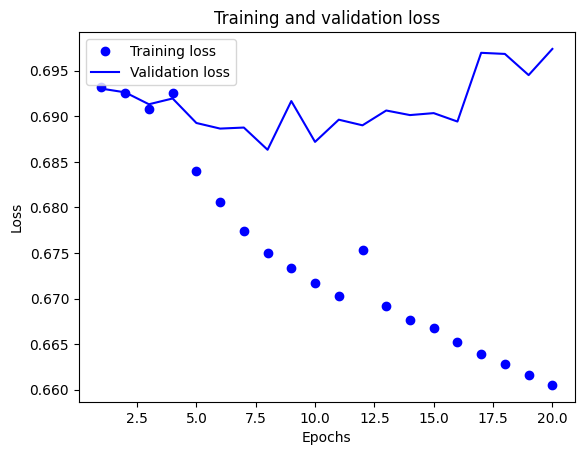

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Loss plot
# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

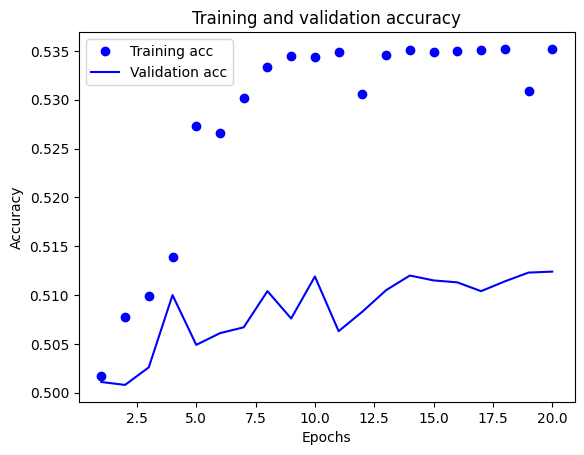

In [ ]:
plt.clf()   # 그림을 초기화합니다

# ACC plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##Word2Vec의 적용
라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법으로 단어의 특성을 저차원 벡터값으로 표현할 수 있는 워드 임베딩(word embedding) 기법이 있다는 언급

In [ ]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다.
word2vec_file_path = '/content/drive/MyDrive/Colab Notebooks/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim)) # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다.
vectors = model.get_weights()[0]
"""	•	학습된 Embedding 레이어의 가중치 값을 가져옵니다.
	  •	이 값은 단어를 임베딩 벡터로 변환한 결과입니다.
	  •	vectors[i, :]는 i번째 단어의 임베딩 벡터입니다."""
for i in range(4,vocab_size): # 	5.	for i in range(4, vocab_size): 특수문자(4개)를 제외하고, 나머지 단어들에 대해 반복합니다.
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
    """ •	index_to_word[i]: 단어의 텍스트 표현.
    	•	' '.join(map(str, list(vectors[i, :]))): i번째 단어의 임베딩 벡터를 문자열로 변환하여 공백으로 연결.
	    •	파일에 각 단어와 그 단어의 임베딩 벡터를 기록합니다.
	    •	예를 들어, index_to_word[5]='happy', vectors[5,:]=[0.12, 0.54, 0.33, -0.24]인 경우:"""
f.close()

In [ ]:
#gensim에서 제공하는 패키지를 이용해, 위에 남긴 임베딩 파라미터를 읽어서 word vector로 활용할 수 있습니다.
from gensim.models.keyedvectors import Word2VecKeyedVectors
# 단어 임베딩 벡터를 로드하고 조작할 수 있는 기능을 제공
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
"""	•	load_word2vec_format: Word2Vec 형식의 파일을 로드합니다.
	•	word2vec_file_path: 이전에 저장한 word2vec.txt 파일의 경로를 지정합니다.
	•	binary=False: 파일이 텍스트 형식임을 나타냅니다. (binary=True는 바이너리 파일 형식을 의미함)
	•	결과적으로 학습된 단어 임베딩 벡터를 메모리로 로드합니다."""

vector = word_vectors['computer']
"""	•	word_vectors 객체에서 단어 'computer'의 임베딩 벡터를 검색합니다.
	•	결과는 'computer'라는 단어를 나타내는 고정 크기(예: 16차원)의 벡터입니다."""
vector
# 하단의 벡터는 16차원 벡터로, 학습된 임베딩 파라미터를 기반으로 'computer'라는 단어의 의미를 수치적으로 표현한 것입니다.

array([-0.0105613 , -0.00779217,  0.01867118, -0.04053308,  0.04889656,
       -0.00544206, -0.01339429,  0.03081815,  0.0473162 ,  0.05855758,
        0.03560126, -0.03197982, -0.00853932,  0.00370542, -0.00130267,
       -0.03747424], dtype=float32)

word2vec 예시


```
9996 16
happy 0.12 0.54 0.33 -0.24
sad -0.11 0.32 -0.22 0.44
love 0.34 -0.12 0.67 -0.23
```



In [ ]:
# 단어를 하나 주고 그와 가장 유사한 단어와 그 유사도를 확인하는 방법이 있습니다. gensim을 사용하면 아래와 같이 해볼 수 있습니다.
# 워드 벡터가 의미 벡터 공간상에 유의미하게 학습되었는지 확인하는 방법
word_vectors.similar_by_word("love")


[('edison', 0.9092634916305542),
 ('natalie', 0.8932199478149414),
 ('brilliant', 0.8907425403594971),
 ('interactions', 0.88904869556427),
 ('better', 0.8879081606864929),
 ('fresh', 0.8878964185714722),
 ('spectacular', 0.8870565891265869),
 ('creepy', 0.8864218592643738),
 ('miller', 0.8856208324432373),
 ("family's", 0.8852709531784058)]

love라는 단어와 유사한 다른 단어를 그리 잘 찾았다고 느껴지지는 않습니다. 감성 분류 태스크를 잠깐 학습한 것만으로 워드 벡터가 유의미하게 학습되기는 어려운 것 같습니다. 우리가 다룬 정도의 훈련 데이터로는 워드 벡터를 정교하게 학습시키기 어렵습니다.

---



---



## 구글에서 제공하는 Word2Vec이라는 사전학습된(Pretrained) 워드 임베딩 모델을 가져다 활용

*   Word2Vec은 무려 1억 개의 단어로 구성된 Google News dataset을 바탕으로 학습되었습니다. 총 300만 개의 단어를 각각 300차원의 벡터로 표현한 것입니다. Word2Vec이 학습되는 원리에 대해서는 차후 깊이 있게 다루게 될 것입니다. 하지만 그렇게 해서 학습된 Word2Vec이라는 것도 실은 방금 우리가 파일에 써본 Embedding Layer와 원리는 동일합니다.



In [ ]:
from gensim.models import KeyedVectors

word2vec_path = '/content/drive/MyDrive/Colab Notebooks/sentiment_classification/data/GoogleNews-vectors-negative300 2.bin'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
# 	•	limit=1000000: 상위 100만 개의 단어만 로드하여 메모리 사용을 제한합니다.
"""300dim의 벡터로 이루어진 300만 개의 단어입니다. 이 단어 사전을 메모리에 모두 로딩하면 아주 높은 확률로 여러분의 실습환경에 메모리 에러가 날 것입니다.
그래서 KeyedVectors.load_word2vec_format 메서드로 워드 벡터를 로딩할 때 가장 많이 사용되는 상위 100만 개만 limt으로 조건을 주어 로딩했습니다.
"""
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.
# 	•	이 벡터는 300차원(길이 300)의 숫자 배열로 구성되며, 단어의 의미적 정보를 포함합니다.


array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [ ]:
# 300dim의 벡터로 이루어진 300만 개의 단어
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

## 이제 우리는 이전 스텝에서 학습했던 모델의 임베딩 레이어를 Word2Vec의 것으로 교체하여 다시 학습시켜 볼 것입니다.

In [ ]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)
"""	•	크기는 (10000, 300)으로, 각 단어마다 300차원의 벡터를 할당합니다.
	•	이 행렬은 사전 학습된 Word2Vec 임베딩으로 대체될 준비 상태입니다."""

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]
"""	•	index_to_word[i]: i번째 단어를 가져옵니다.
  	•	해당 단어가 Word2Vec 사전(word2vec)에 존재하는지 확인합니다.
  	•	Word2Vec 모델은 사전 학습된 단어 벡터를 포함하고 있습니다. 따라서 모델이 학습한 단어만 대체할 수 있습니다.
    •	Word2Vec에 없는 단어는 랜덤 값 그대로 유지됩니다."""

'\t•\tindex_to_word[i]: i번째 단어를 가져옵니다.\n  \t•\t해당 단어가 Word2Vec 사전(word2vec)에 존재하는지 확인합니다.\n  \t•\tWord2Vec 모델은 사전 학습된 단어 벡터를 포함하고 있습니다. 따라서 모델이 학습한 단어만 대체할 수 있습니다.\n    •\tWord2Vec에 없는 단어는 랜덤 값 그대로 유지됩니다.'

In [ ]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, # input dim
                                 word_vector_dim, # output dim 임베딩벡터 차원
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen,
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5)) # 5: 풀링 크기 (차원을 5배 줄임).
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D()) #	시퀀스 전체에서 가장 큰 값을 추출해 출력. 이는 시퀀스를 단일 벡터로 변환합니다.
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()
"""	•	첫 번째 Dense 층은 이진 분류를 수행하기 전에 고차원에서 학습된 특징들을 압축하고 조합하는 역할을 합니다.
	•	8개의 뉴런은 하이퍼파라미터로, 학습해야 할 문제의 복잡도에 따라 적절한 값을 선택합니다.
	•	너무 많은 뉴런: 과적합 위험 증가 (불필요하게 복잡한 모델).
	•	너무 적은 뉴런: 모델이 충분히 복잡한 특징을 학습하지 못함 (언더피팅).
	•	개발자는 실험적으로 적절한 뉴런 수를 결정하며, 이 코드에서는 비교적 단순한 문제라고 가정하고 8개의 뉴런을 설정했습니다.
  	1.	첫 번째 Dense 층:
	•	이전 단계에서 추출된 고차원 특징을 처리하여 학습에 유용한 표현으로 변환.
	•	뉴런 수(8개)는 적당한 학습 능력을 유지하면서 복잡도를 제한하는 역할."""


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.5285 - loss: 0.6942 - val_accuracy: 0.6018 - val_loss: 0.6736
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.6315 - loss: 0.6574 - val_accuracy: 0.6965 - val_loss: 0.6066
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.7598 - loss: 0.5475 - val_accuracy: 0.8242 - val_loss: 0.4269
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.8551 - loss: 0.3679 - val_accuracy: 0.8435 - val_loss: 0.3506
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.9005 - loss: 0.2577 - val_accuracy: 0.8664 - val_loss: 0.3125
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9260 - loss: 0.2059 - val_accuracy: 0.8797 - val_loss: 0.2915
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9469 - loss: 0.1625 - val_accuracy: 0.8802 - val_loss: 0.2926
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9672 - loss: 0.1214 - val_accuracy: 0

In [ ]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 3s - 3ms/step - accuracy: 0.8617 - loss: 0.5408
[0.5407720804214478, 0.8616799712181091]
